In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.cluster.hierarchy import dendrogram, linkage

# Unsupervised Learning
Unsupervised learning takes unlabeled data and finds relationships and structures in the data. For example, unsupervised learning may be used to look at shopping habits of people who shop at Amazon and divide those people into groups that behave similarly. Unlike supervised learning, unsupervised learning has input variables, but no output variable. Because the data used in unsupervised learning is not labeled, there is no measure of accuracy for the results of unsupervised learning.

**The Challenge of Unsupervised Learning**

Because unsupervised learning has no specific goal, it is more subjective than supervised learning. There is no accepted method to cross-validate findings from unsupervised learning. This makes it difficult to define measures of success. Despite these difficulties, unsupervised learning can provide useful insight into the data that is analyzed.

# Clustering

**Background Reading:** Intro to Statistical Learning 12.1, 12.4

**Essence of Data:**
Clustering is used to see if the data can be divided into relatively distinct subgroups, or clusters. The goal is to find a way to assign each data point to a subgroup such that observations in different groups are substantially different and observations in the same group are similar. The two most popular clustering methods are K-Means Clustering and Hierarchical Clustering.

**K-Means Clustering**
K-Means Clustering splits the data into K distinct groups such that every data point belongs to exactly one group. A good split will have low within-cluster variation (W), meaning that the observations within each cluster are similar. One way to quantify within-cluster variation is the squared Euclidian distance, defined below.
<div>
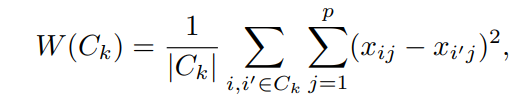
</div>

In this equation, |Ck| represents the number of observations in each cluster. Thus, the formula is taking the average distance between all pairs of data points in the cluster. The goal is then to divide the observations into clusters in a way that minimizes the sum of the within-cluster variation across all clusters, as shown below.
<div>
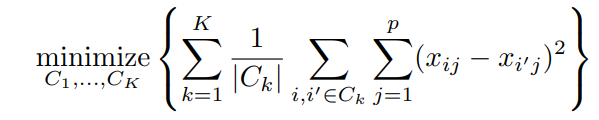
</div>

**How does K-Means clustering work?**
For a dataset of n observations, there are almost K^n ways to divide the observations into K cluters. Clearly, for large datasets, it is not feasible to test every different case. Instead, the K-Means Clustering Algorithm can be used to find a local optimum. While this may not be the absolute optimal solution, it will still be good enough to derive insights from the data.

<div>
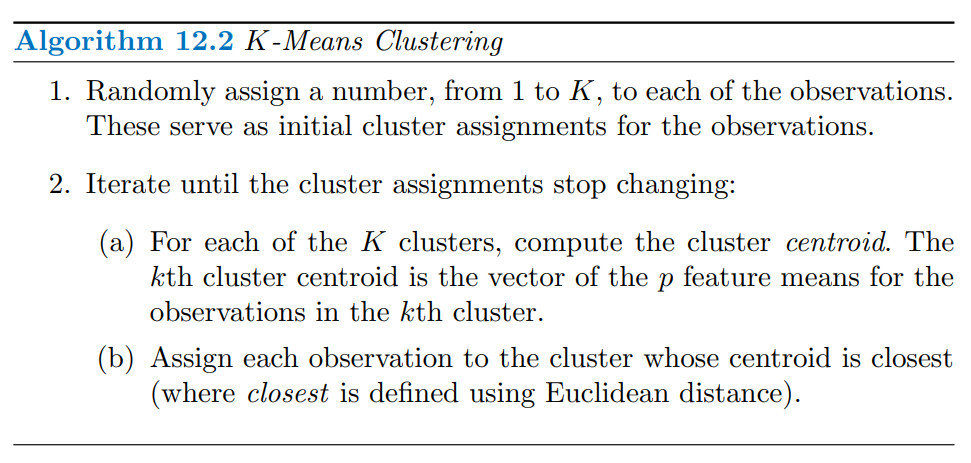
</div>

This algorithm is demonstrated below.

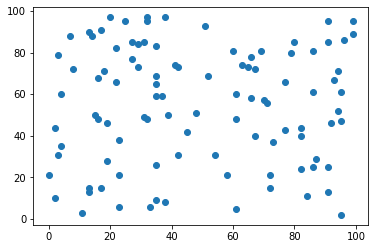

In [10]:
#create 50 observations, each with 2 attributes (random integers between 0 and 100)
df = pd.DataFrame(np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
plt.scatter(df['A'], df['B'])
plt.show()

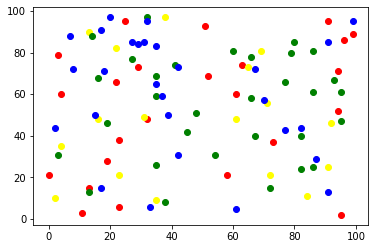

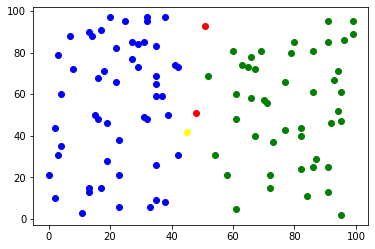

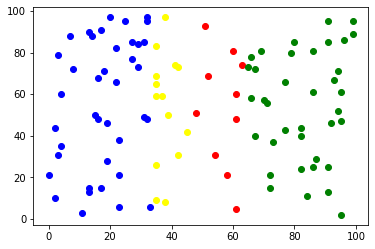

In [46]:
#We will be using K=4 clusters. First, randomly assign each point to a cluster.
df['Cluster']=''
for i in range(0,len(df['A'])):
    df.loc[i,'Cluster']=np.random.randint(1,5)

#plot the data
plt.scatter(df.loc[df['Cluster']==1]['A'],df.loc[df['Cluster']==1]['B'], c='red')
plt.scatter(df.loc[df['Cluster']==2]['A'],df.loc[df['Cluster']==2]['B'], c='yellow')
plt.scatter(df.loc[df['Cluster']==3]['A'],df.loc[df['Cluster']==3]['B'], c='green')
plt.scatter(df.loc[df['Cluster']==4]['A'],df.loc[df['Cluster']==4]['B'], c='blue')
plt.show()

#compute cluster centroids
centroid1=(df.loc[df['Cluster']==1]['A'].mean(),df.loc[df['Cluster']==1]['B'].mean())
centroid2=(df.loc[df['Cluster']==2]['A'].mean(),df.loc[df['Cluster']==2]['B'].mean())
centroid3=(df.loc[df['Cluster']==3]['A'].mean(),df.loc[df['Cluster']==3]['B'].mean())
centroid4=(df.loc[df['Cluster']==4]['A'].mean(),df.loc[df['Cluster']==4]['B'].mean())
#reassign points to whichever cluster's centroid they are closest to
for i in range(0,len(df['A'])):
    dist1=math.sqrt((df.loc[i,'A']-centroid1[0])**2+(df.loc[i,'A']-centroid1[0])**2)
    dist2=math.sqrt((df.loc[i,'A']-centroid2[0])**2+(df.loc[i,'A']-centroid2[0])**2)
    dist3=math.sqrt((df.loc[i,'A']-centroid3[0])**2+(df.loc[i,'A']-centroid3[0])**2)
    dist4=math.sqrt((df.loc[i,'A']-centroid4[0])**2+(df.loc[i,'A']-centroid4[0])**2)
    if dist1==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=1
    elif dist2==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=2
    elif dist3==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=3
    else:
        df.loc[i,'Cluster']=4
#plot the data
plt.scatter(df.loc[df['Cluster']==1]['A'],df.loc[df['Cluster']==1]['B'], c='red')
plt.scatter(df.loc[df['Cluster']==2]['A'],df.loc[df['Cluster']==2]['B'], c='yellow')
plt.scatter(df.loc[df['Cluster']==3]['A'],df.loc[df['Cluster']==3]['B'], c='green')
plt.scatter(df.loc[df['Cluster']==4]['A'],df.loc[df['Cluster']==4]['B'], c='blue')
plt.show()

#repeat
#compute cluster centroids
centroid1=(df.loc[df['Cluster']==1]['A'].mean(),df.loc[df['Cluster']==1]['B'].mean())
centroid2=(df.loc[df['Cluster']==2]['A'].mean(),df.loc[df['Cluster']==2]['B'].mean())
centroid3=(df.loc[df['Cluster']==3]['A'].mean(),df.loc[df['Cluster']==3]['B'].mean())
centroid4=(df.loc[df['Cluster']==4]['A'].mean(),df.loc[df['Cluster']==4]['B'].mean())
#reassign points to whichever cluster's centroid they are closest to
for i in range(0,len(df['A'])):
    dist1=math.sqrt((df.loc[i,'A']-centroid1[0])**2+(df.loc[i,'A']-centroid1[0])**2)
    dist2=math.sqrt((df.loc[i,'A']-centroid2[0])**2+(df.loc[i,'A']-centroid2[0])**2)
    dist3=math.sqrt((df.loc[i,'A']-centroid3[0])**2+(df.loc[i,'A']-centroid3[0])**2)
    dist4=math.sqrt((df.loc[i,'A']-centroid4[0])**2+(df.loc[i,'A']-centroid4[0])**2)
    if dist1==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=1
    elif dist2==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=2
    elif dist3==min(dist1,dist2,dist3,dist4):
        df.loc[i,'Cluster']=3
    else:
        df.loc[i,'Cluster']=4
#plot the data
plt.scatter(df.loc[df['Cluster']==1]['A'],df.loc[df['Cluster']==1]['B'], c='red')
plt.scatter(df.loc[df['Cluster']==2]['A'],df.loc[df['Cluster']==2]['B'], c='yellow')
plt.scatter(df.loc[df['Cluster']==3]['A'],df.loc[df['Cluster']==3]['B'], c='green')
plt.scatter(df.loc[df['Cluster']==4]['A'],df.loc[df['Cluster']==4]['B'], c='blue')
plt.show()

Because the data in the above example was a small set generated randomly, the results will vary significantly each time the code is run. Some times, you may end up with 4 clusters. However, there are instances where the algorithm will result in fewer than 4 clusters. This because the data points are relatively uniformly spread out. This would not happen with more realistic data that actually had meaning. 

**Hierarchical Clustering**

Hierarchical clustering is a clustering method that does not force the user to specify the number of clusters. Instead, hierarichal clustering results in a dendogram that shows what the clusters would be at different numbers of clusters. The dendogram is created by looking at the dissimilarity of each pair of observations. The two that are the least dissimilar are fused. Then the dissimilarity between all pairs of observations (or fused observations) is recalculated, and the two least dissimilar are fused. The process continues until there is only one group.

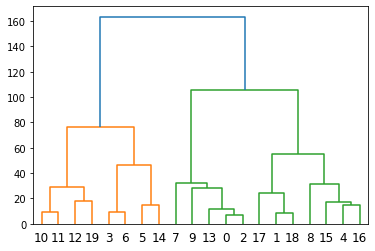

In [52]:
#create 2 lists of 20 random integers between 0 and 100
x=[np.random.randint(0,100) for i in range(0,20)]
y=[np.random.randint(0,100) for i in range(0,20)]
#combine the two lists
data=list(zip(x,y))
#create the dendogram
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

**Interpreting the Dendogram**
The numbers on the horizontal axis of the graph represent the initial order of each observation. The height at which two observations fuse indicates how similar the two points are. The lower the fuse point, the more similar the points. Note that the horizontal proximity of two points does not reflect their similarity. For example, 6 and 5 are adjacent, but they do not fuse until relatively high on the plot.

By making a horizontal cut on the dendogram, you can see what the clusters would be for that number of clusters. For example, if you cut horizontally at 60, there would be 4 clusters: (10,11,12,19), (3,6,5,14), (7,9,13,0,2), and (8,15,4,16). A lower cut will result in a higher number of clusters. Thus instead of running K-Means clustering on a variety of different K values, you could create a dendogram and visualize the split of the data into different numbers of clusters.

**Calculating Dissimilarity**

For two points, the dissimilarity can be easily calculated by taking the Euclidian distance between them. This task becomes more difficult when assessing the dissimilarity between a point and a cluster of points, or between two clusters of points. In these cases, linkage is used. Linkage specifies how the dissimilarity can be calculated based on the distance between observations in a cluster. The four most commonly used types of linkage are shown below.
<div>
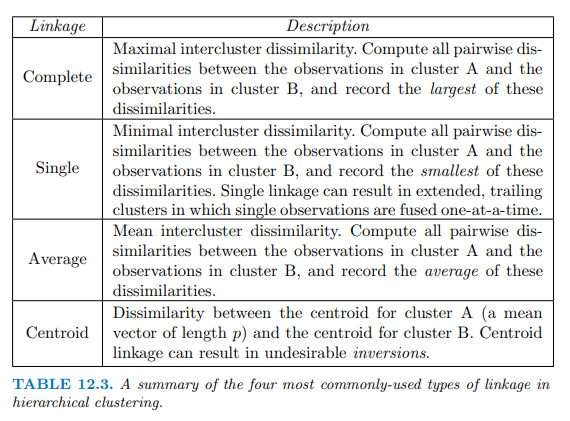
</div>


**Dataset:**
<!--use both k-means and heirarchical clustering on the same set-->
<!--possible sample dataset: https://www.kaggle.com/datasets/abcsds/pokemon-->
<!--possible large dataset: https://www.kaggle.com/code/mgmarques/customer-segmentation-and-market-basket-analysis/data
#https://archive.ics.uci.edu/ml/datasets.php?format=&task=clu&att=&area=&numAtt=greater100&numIns=&type=&sort=nameUp&view=table -->


**Real World Applications:**

CrimeStat is a software used to map crimes. Police departments use this software to make informed decisions about where to station officers and focus crime prevention efforts. An example hierarchical clustering of burglary hotspots in Baltimore County, based on 1996 data. The different color clusters represent different cluster sizes.
<div>
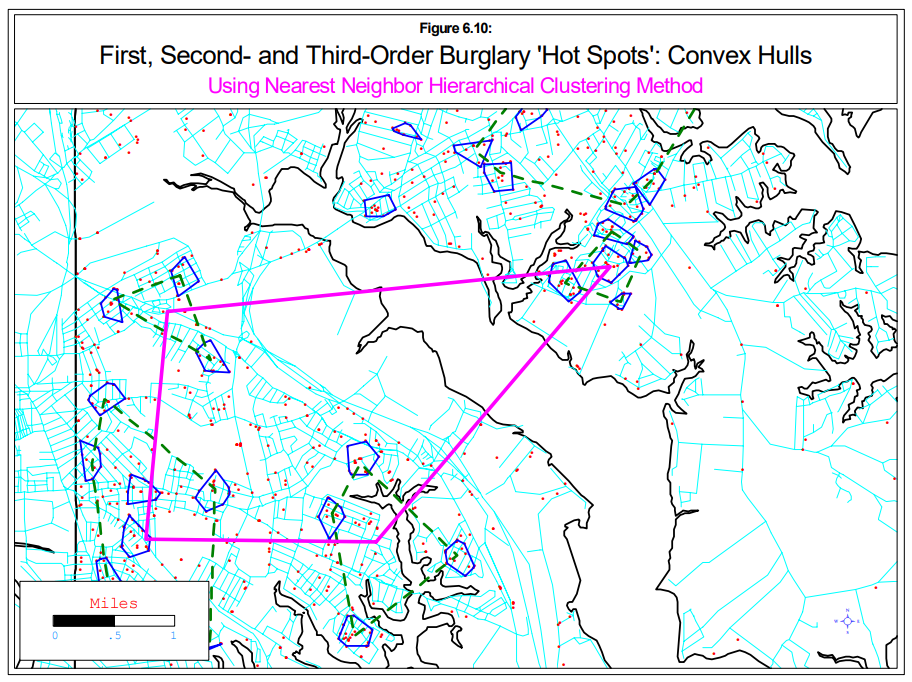
</div>

K-Means clustering and PCA can be used for change detection in sattelite images. The approach is described below.
<div>
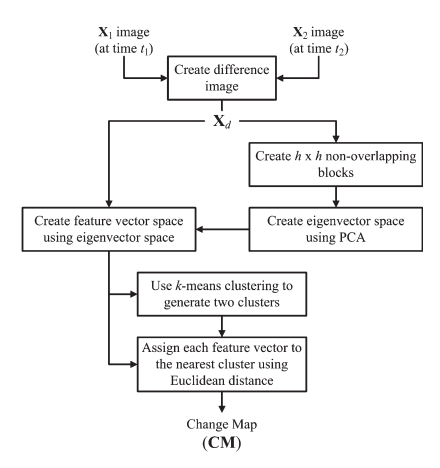
</div>

Many retailers use K-Means clustering for market segmentation. By clustering, they can identify groups of similar customers.
<!--via https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/-->
<div>
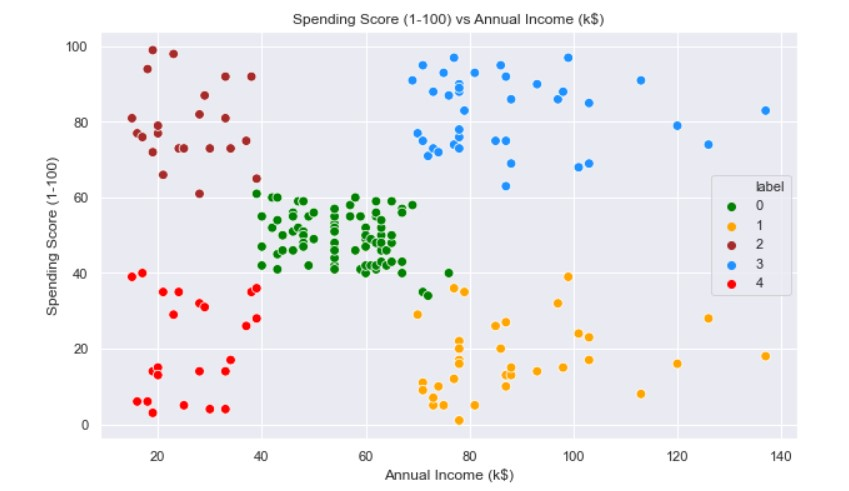
</div>

Clustering can be used in recommendation algorithms. (fill in info here!)

Sources:

https://en.wikipedia.org/wiki/CrimeStat

https://www.icpsr.umich.edu/CrimeStat/files/CrimeStatChapter.6.pdf

https://ieeexplore-ieee-org.pitt.idm.oclc.org/stamp/stamp.jsp?tp=&arnumber=5196726&tag=1

https://www.analyticsvidhya.com/blog/2021/05/k-means-clustering-with-mall-customer-segmentation-data-full-detailed-code-and-explanation/--



# The Future of AI and Society

**Background Reading**

https://builtin.com/artificial-intelligence/artificial-intelligence-future

https://www.pewresearch.org/internet/2018/12/10/artificial-intelligence-and-the-future-of-humans/

https://www.vice.com/en/article/y3pezm/scientists-increasingly-cant-explain-how-ai-works

The Ethical Algorithm, Chapter 5

When Will AI Exceed Human Performance? Evidence from AI Experts - https://arxiv.org/pdf/1705.08807.pdf

**Are Fears Unfounded?**

Hollywood loves to imagine future AI in a negative light. From The Terminator to Age of Ultron, AI in media is characterized by machines that seek to extinguish humanity. Is this a realistic risk? MIT physics professor Max Tegmark argues that AI itself is not what we should fear. Instead, our worries should center on the use of AI by people with bad intentions: “The real threat from AI isn’t malice, like in silly Hollywood movies, but competence — AI accomplishing goals that just aren’t aligned with ours.”

**Future Applications of AI**

Like any tool, AI can be used for good or for bad. AI expert Kai-Fu Lee predicts that within 20 years, many routine jobs may be replaced by AI. This could be liberating or devastating, depending on how society distibutes the benefits from AI. If large companies replace workers with AI, it could be an opportunity for those workers to learn new skills or enjoy more free time, or they could be left jobless while the company reaps the profits. In the past, technological improvements have increased productivity, but not resulted in poeple working less. The elimination of mundane and routine tasks by AI could fund a universal basic income system where everyone can reap the benefits of automation, or it could futher the division between the rich and the poor.

Researchers at the Future of Humanity Institute at Oxford University surveyed researchers about when they believe AI will replace humans at certain tasks. The results are shown below.
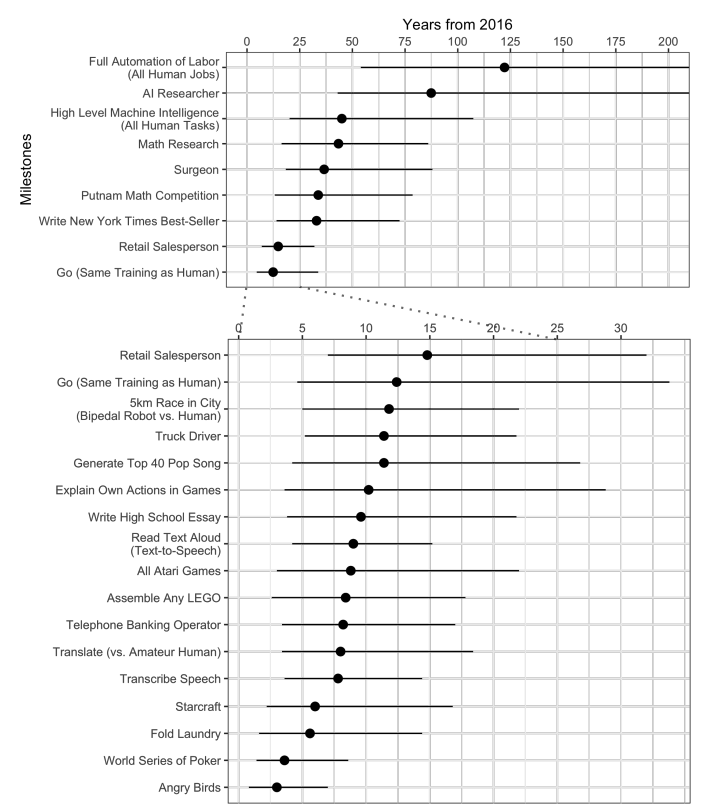

It may be surprising to see creative exploits such as writing book and songs likely to be able to be achieved by AI in the next few decades. This brings up the question of what constitutes creativity, and if there is something that sets human brains apart from highly complex beams. Is there some aspect of humanity that could never be replaced by AI? Or are our brains nothing but highly optimized machines?

**The Singularity**

Some minds in tech worry that if a computer could gain the ability to build a better computer, there would be an "intelligence explosion", resulting in an ultraintelligent machine that far surpasses human capabilities. Researchers call this point the singularity. "This is a problem because it can be hard to anticipate exactly what a computer is programmed to do in a particular situation" (The Ethical Algorithm, pg181).
<div>
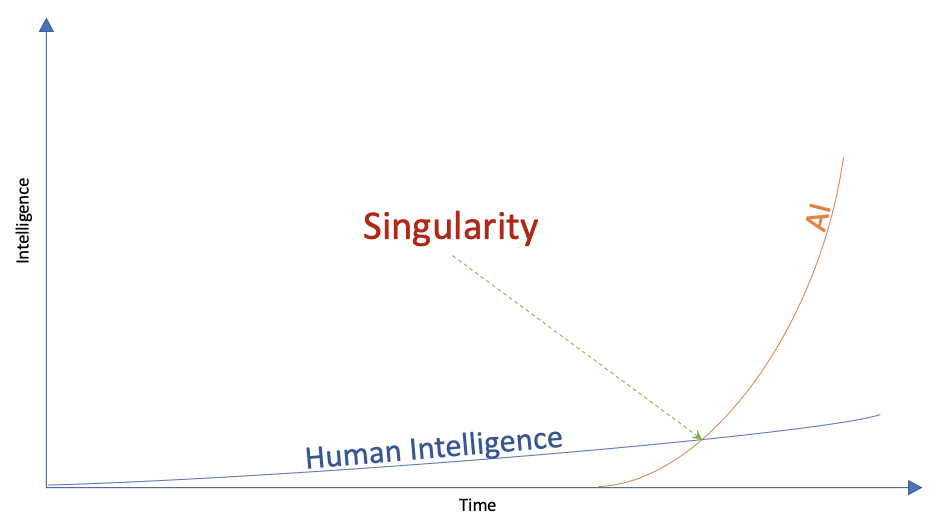
</div>

But would there be an explosion? What if the computer could build a better computer, but not as quickly as humans could?


Whether or not there is a risk of an intelligence explosion all depends on the rate at which a computer could improve itself. If there is a diminishing rate of returns on research, there will not be an exponential rate of progress. However, if the computer's returns on research are linear, or worse exponential, we will reach a point where there is an unbelievable explosion in the computer's capailities. Some researchers argue that we should be prepared for this explosion and should start having preparatory conversations now in order to give humanity the best chance. Others say that we are not currently equipped to have a productive conversation about the singularity, we have no idea what will happen. 


**Questions for Consideration**

-What tasks in your day-to-day life would you like to see automated?

-What jobs do you think could never be replaced by AI?

-How should society handle workers displaced by AI?

-What separates humans from machines? Could a machine every truly replicate the human brain?

-AI enables an increased level of personalization in digital experiences. Is this a good thing?

-How can AI researchers increase visibility into how their algorithms work and avoid unintended consequences? 

-Is it fair to make decisions in a way that humans can't understand?